## Multidimensional Discrimination Synthetic Data Generation

In [12]:

%load_ext autoreload
%autoreload 

import os
import sys
import yaml
import pandas as pd
sys.path.append(os.path.join('..', 'src'))
# import helper
from plots import visualize_histograms, plot_measure_discrimination

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
def load_config(file_path):
    with open(file_path, 'r') as file:
        return yaml.safe_load(file)

In [14]:
SEED = 42
DATA_PATH = f"../generated_data/seed_{SEED}"

def load_all_scenarios():
    """Load all discrimination scenarios"""
    scenarios = {}
    scenario_files = {
        'no_discrimination': f'no_discrimination_seed_{SEED}.csv',
        'single_discrimination': f'single_discrimination_seed_{SEED}.csv',
        'multiple_discrimination': f'multiple_discrimination_seed_{SEED}.csv', 
        'intersectional_discrimination': f'intersectional_discrimination_seed_{SEED}.csv',
        'compounded_discrimination': f'compounded_discrimination_seed_{SEED}.csv'
    }
    
    for scenario_name, filename in scenario_files.items():
        file_path = os.path.join(DATA_PATH, filename)
        scenarios[scenario_name] = pd.read_csv(file_path)
        # print(f"✓ Loaded {scenario_name}: {scenarios[scenario_name].shape}")
    
    return scenarios

In [15]:
# Load all data
data_scenarios = load_all_scenarios()

# # Store scenario names for reuse
scenario_names = list(data_scenarios.keys())
print(f"📋 Available scenarios: {scenario_names}")

# # individual scenarios
result_no_discr = data_scenarios['no_discrimination']
result_single_discr = data_scenarios['single_discrimination']
result_multiple_discr = data_scenarios['multiple_discrimination']
result_intersectional_discr = data_scenarios['intersectional_discrimination']
result_compounded_discr = data_scenarios['compounded_discrimination']

📋 Available scenarios: ['no_discrimination', 'single_discrimination', 'multiple_discrimination', 'intersectional_discrimination', 'compounded_discrimination']


#### Preset General Values

In [16]:
plot_intersectional=False

### Case One: No Discrimination

In this case, none of the sensitive attributes influence the treatment nor the outcome, $\lambda$ controls the overall effect of the discrimination across all features.

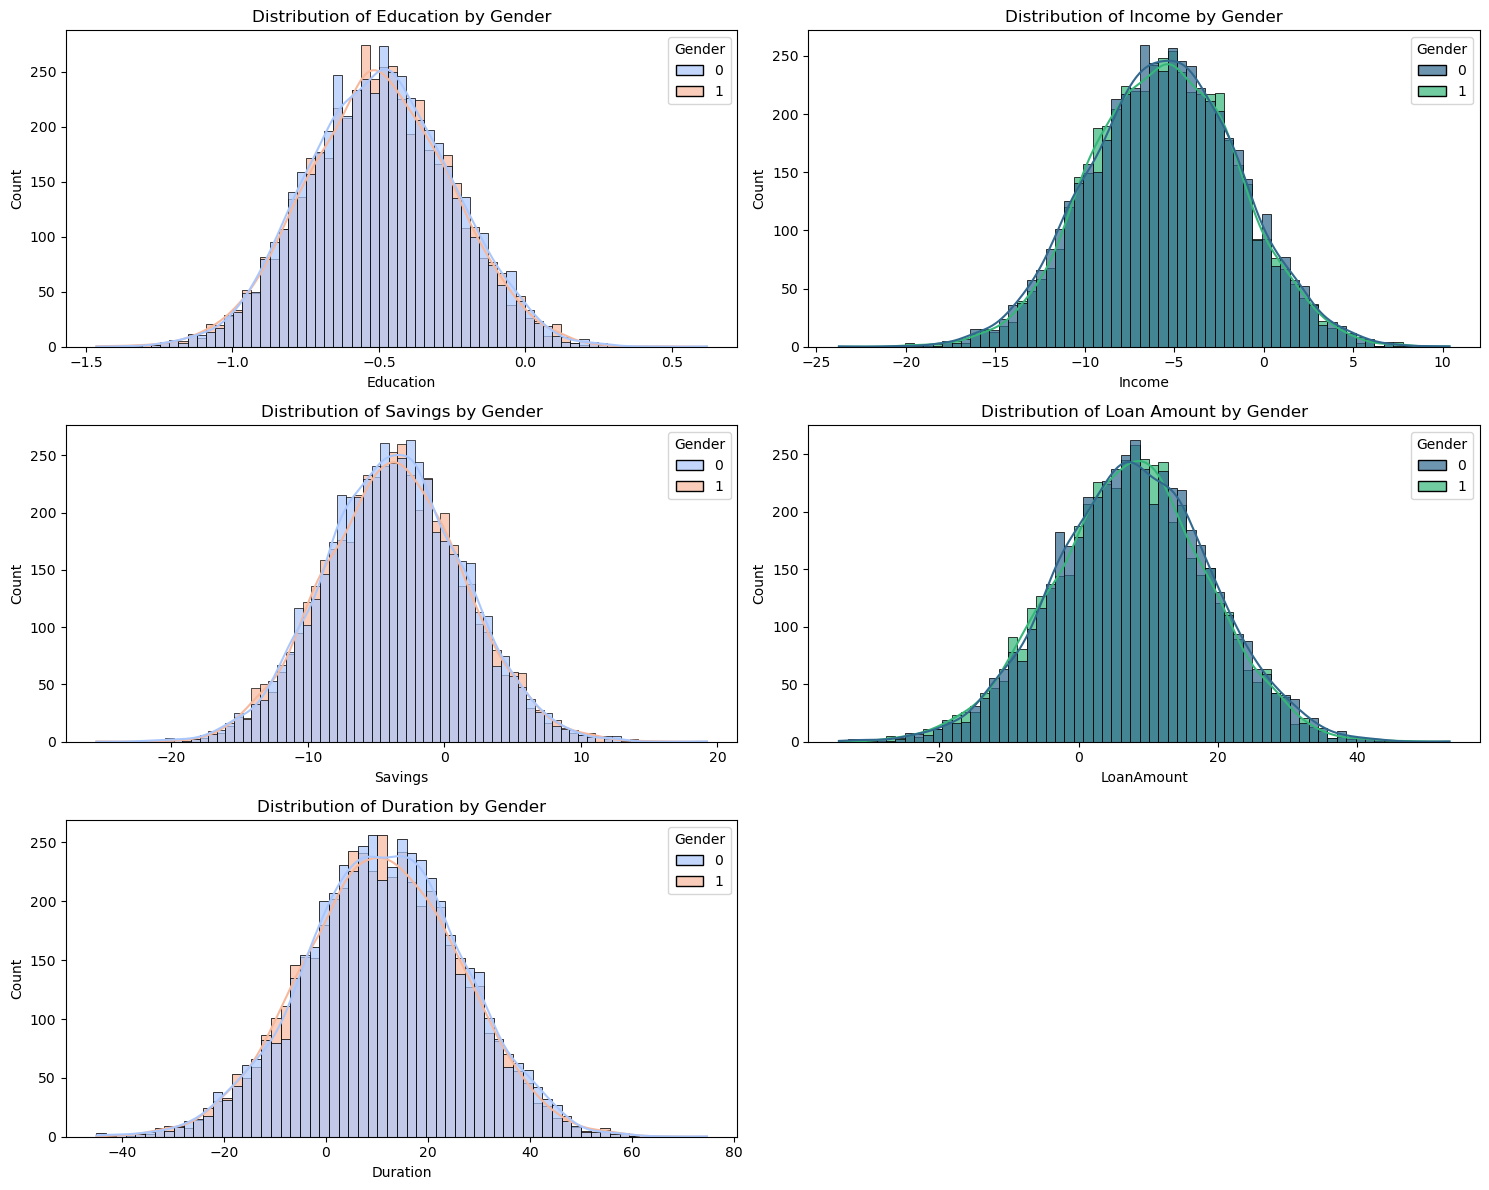

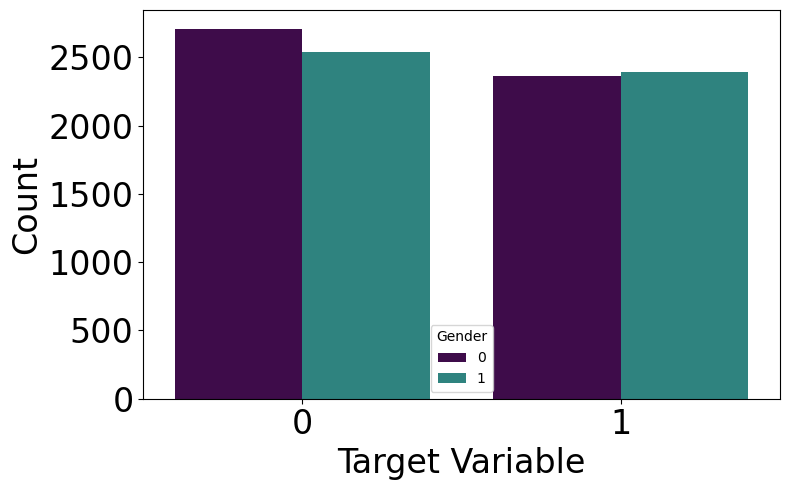

🔍 Outcome disparity by Y:
Y
0    0.0
1    1.0
Name: Y, dtype: float64
Disparity (max - min): 1.0000

🔍 Treatment disparity in LoanAmount by Gender:
Gender
0    7.844924
1    7.386206
Name: LoanAmount, dtype: float64
Disparity (max - min) in LoanAmount: 0.4587

🔍 Treatment disparity in Duration by Gender:
Gender
0    11.440499
1    10.944867
Name: Duration, dtype: float64
Disparity (max - min) in Duration: 0.4956



In [17]:

# Case One: No Discrimination
file_path_no = "../config/no_discrimination.yaml"
config_no_discri = load_config(file_path_no)
measure_bias_col = config_no_discri['measure_bias_col']

plot_measure_discrimination(result_no_discr, measure_bias_col, data_name='No Bias', plot=True, plot_intersectional=plot_intersectional)




### Case Two: Single Discrimination

Here, only one of the sensitive attributes influences the treatment and outcome.

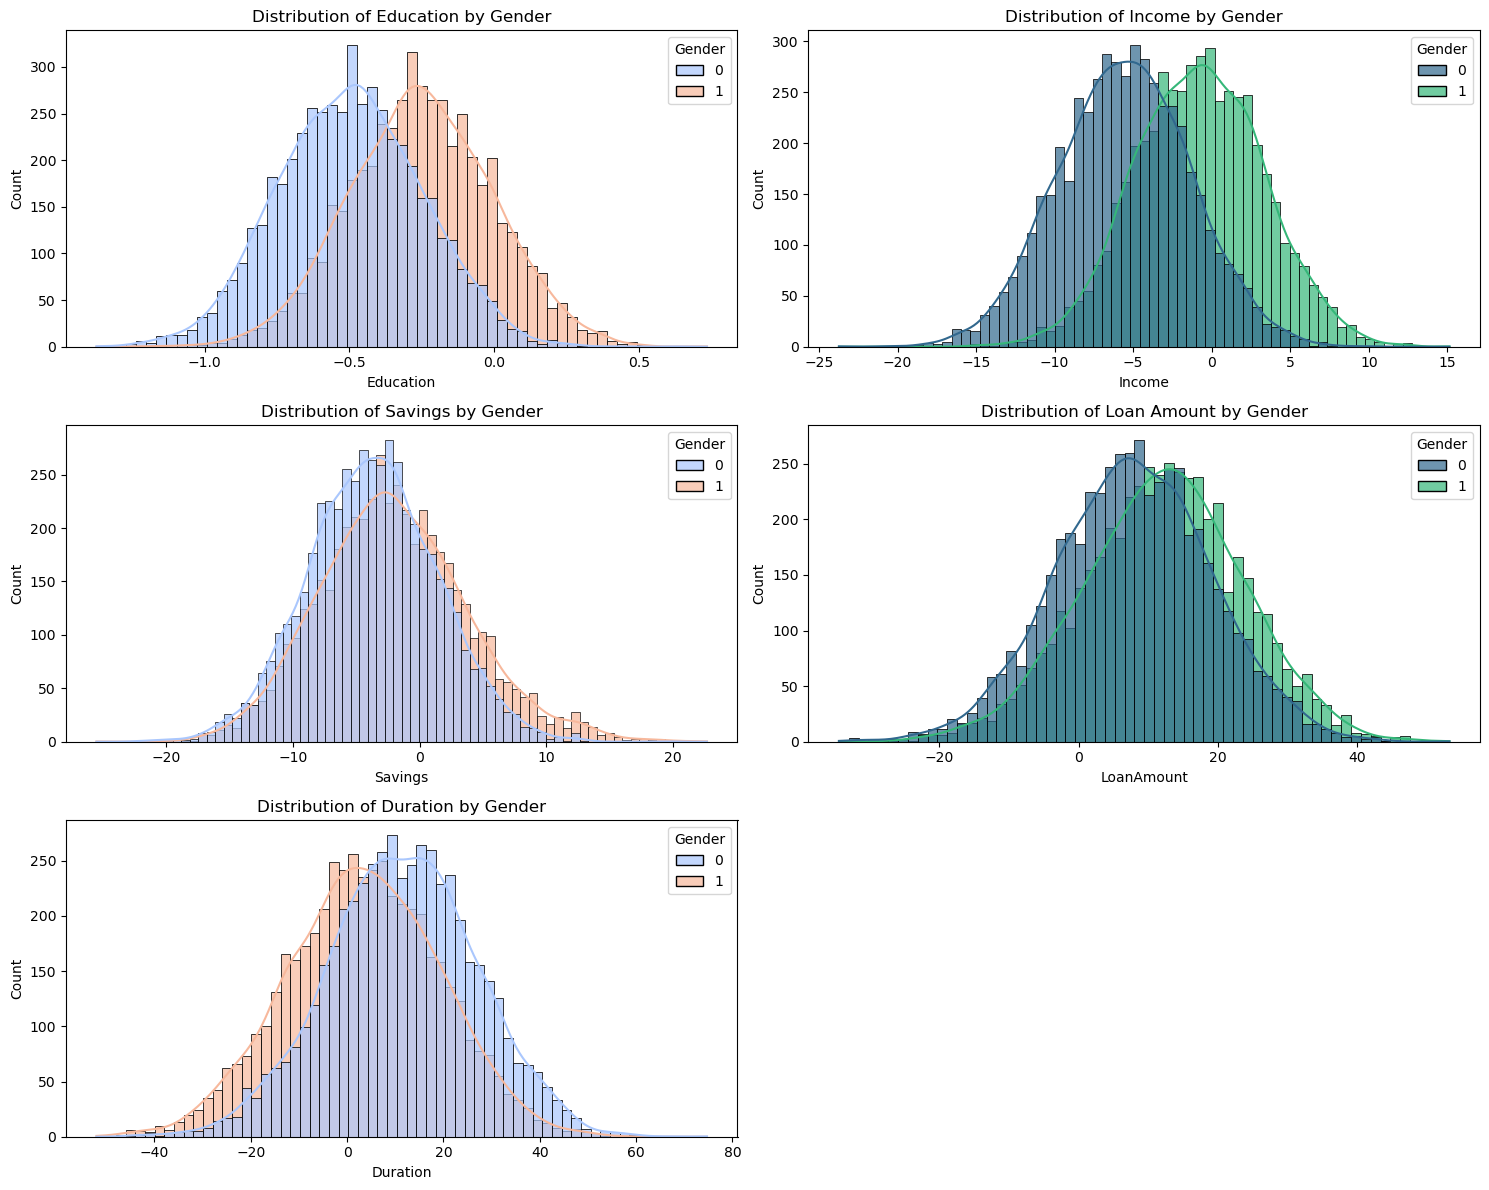

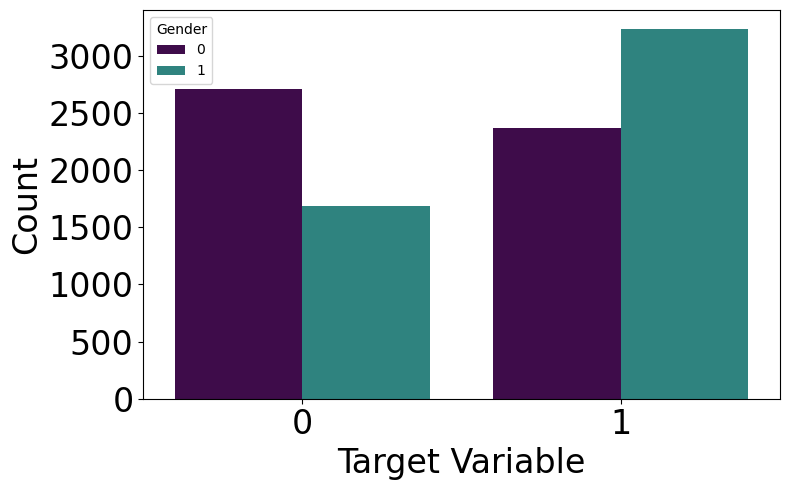

🔍 Outcome disparity by Y:
Y
0    0.0
1    1.0
Name: Y, dtype: float64
Disparity (max - min): 1.0000

🔍 Treatment disparity in LoanAmount by Gender:
Gender
0     7.844924
1    12.094682
Name: LoanAmount, dtype: float64
Disparity (max - min) in LoanAmount: 4.2498

🔍 Treatment disparity in Duration by Gender:
Gender
0    11.440499
1     3.353343
Name: Duration, dtype: float64
Disparity (max - min) in Duration: 8.0872



In [18]:
measure_bias_col = config_no_discri['measure_bias_col']

# Then use helper.measure_discrimination instead of generator.measure_discrimination
plot_measure_discrimination(result_single_discr, measure_bias_col='Gender', data_name='Single Axis Bias', plot=True, plot_intersectional=plot_intersectional)

### Case Three: Multiple Discrimination

Here, the sensitive attributes, i.e S and R, will need to influence the outcome and treatment, but then we should not have interaction between them.

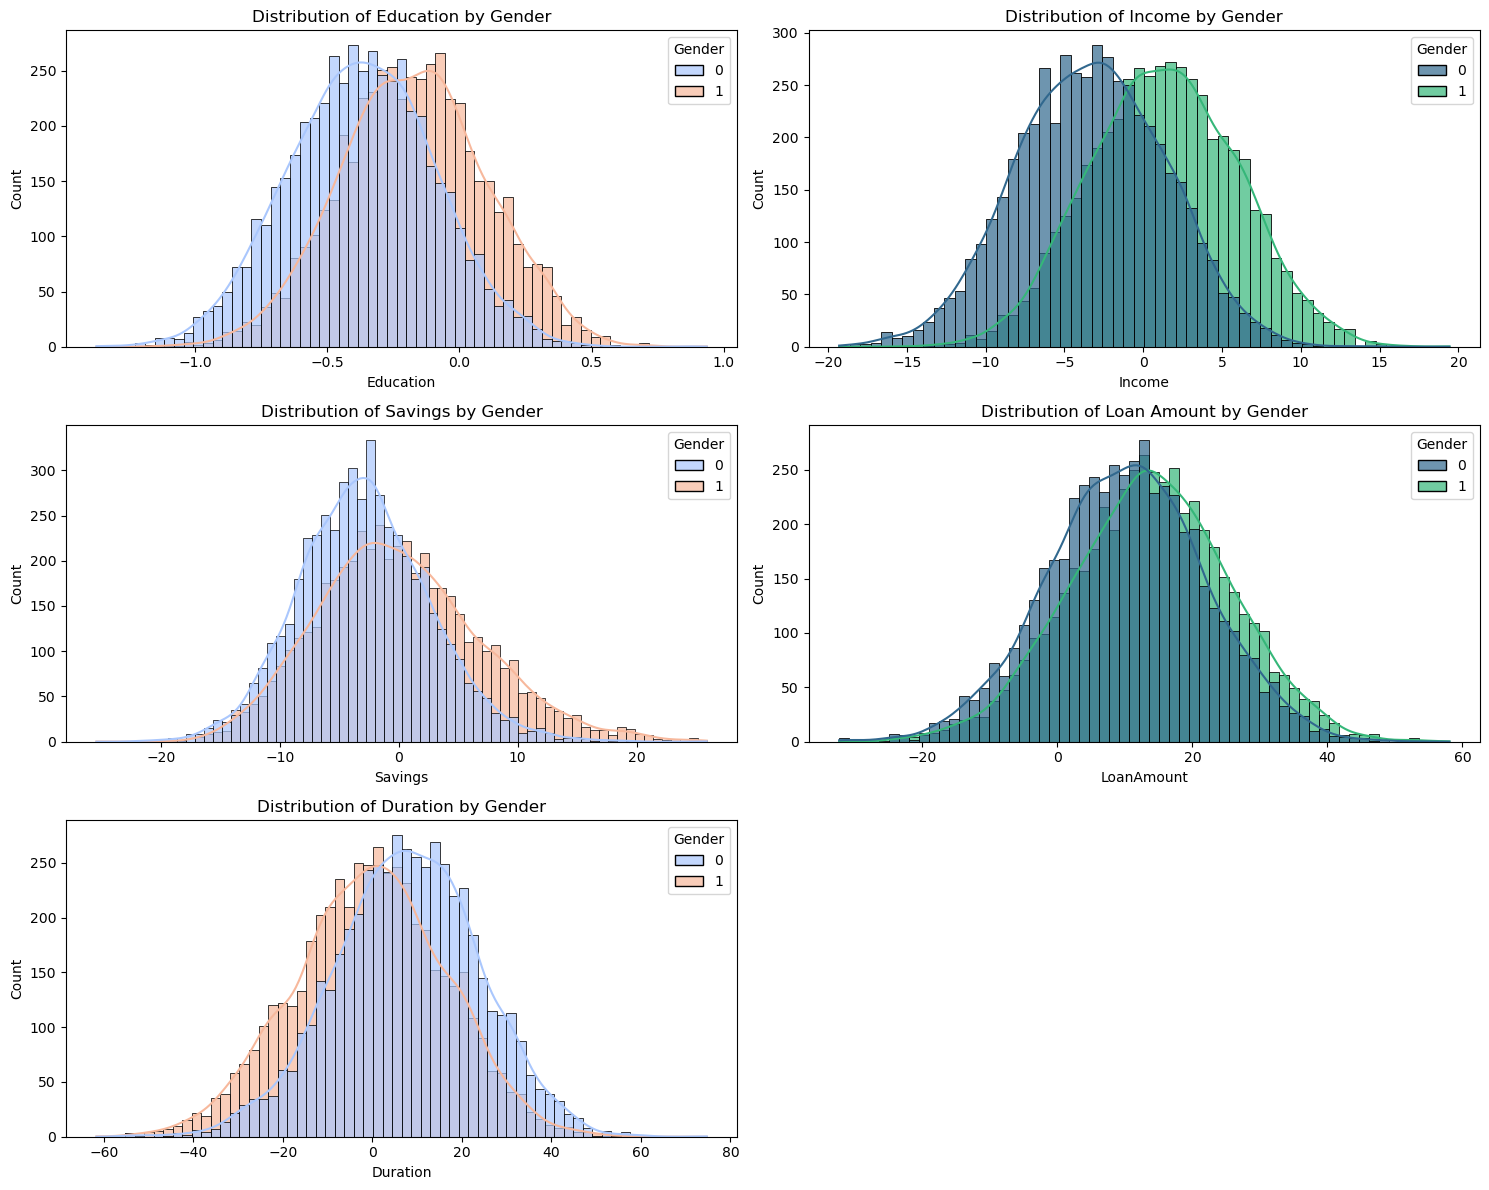

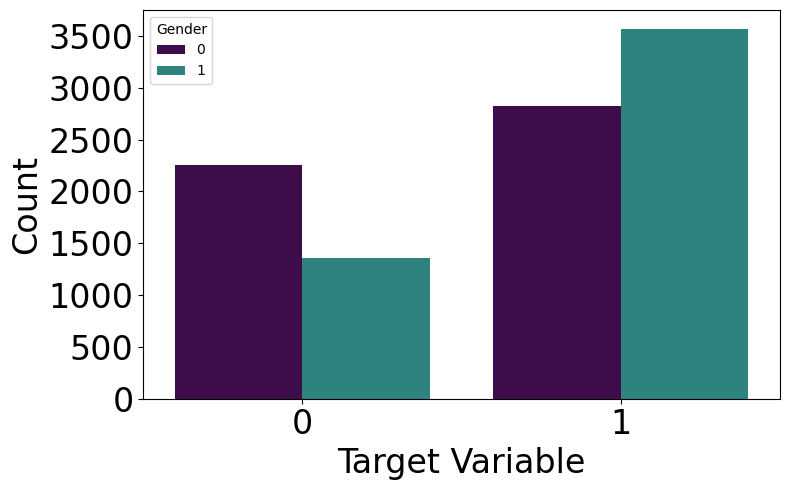

🔍 Outcome disparity by Y:
Y
0    0.0
1    1.0
Name: Y, dtype: float64
Disparity (max - min): 1.0000

🔍 Treatment disparity in LoanAmount by Gender:
Gender
0    10.145402
1    13.669798
Name: LoanAmount, dtype: float64
Disparity (max - min) in LoanAmount: 3.5244

🔍 Treatment disparity in Duration by Gender:
Gender
0    7.752564
1   -0.475476
Name: Duration, dtype: float64
Disparity (max - min) in Duration: 8.2280



In [19]:
file_path_multiple = "../config/multiple_discrimination.yaml"
config_multiple_discr = load_config(file_path_multiple)
measure_bias_col = config_multiple_discr['measure_bias_col']

plot_measure_discrimination(result_multiple_discr, measure_bias_col=measure_bias_col, data_name='Multiple Axis Bias', plot=True, plot_intersectional=plot_intersectional)





### Case Four: Intersectional Discrimination

Here, we model such that only the interaction have an effect on Y.

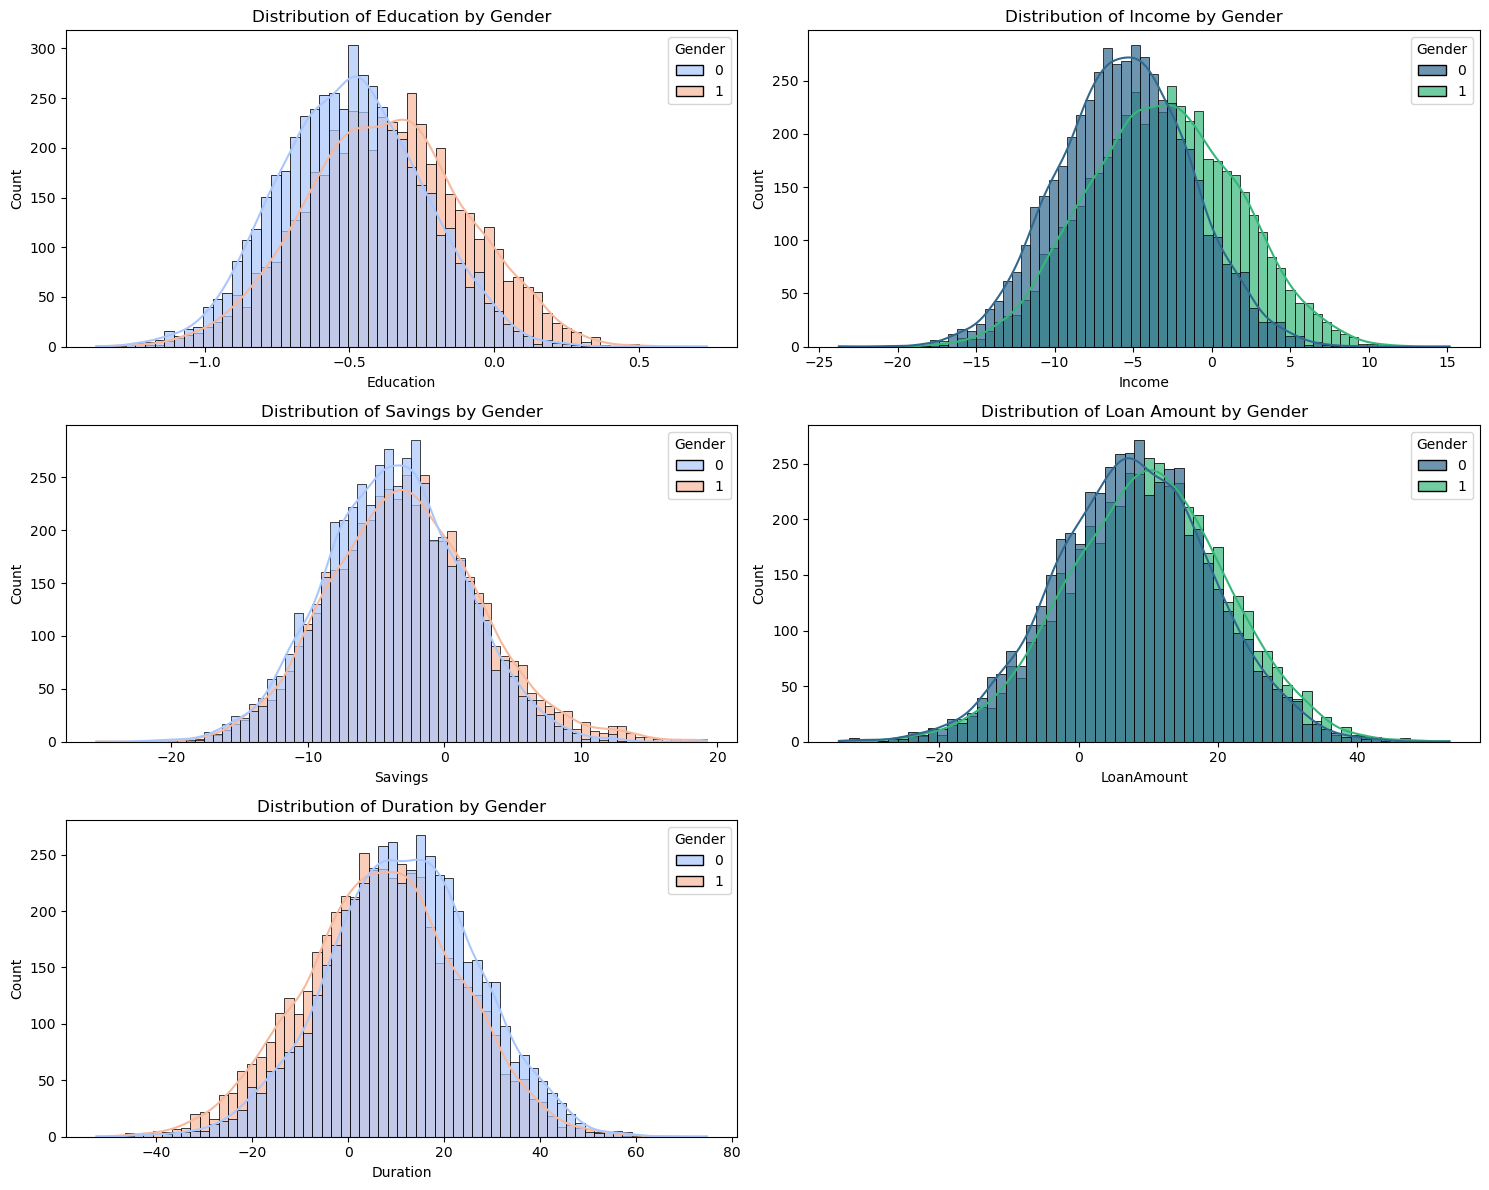

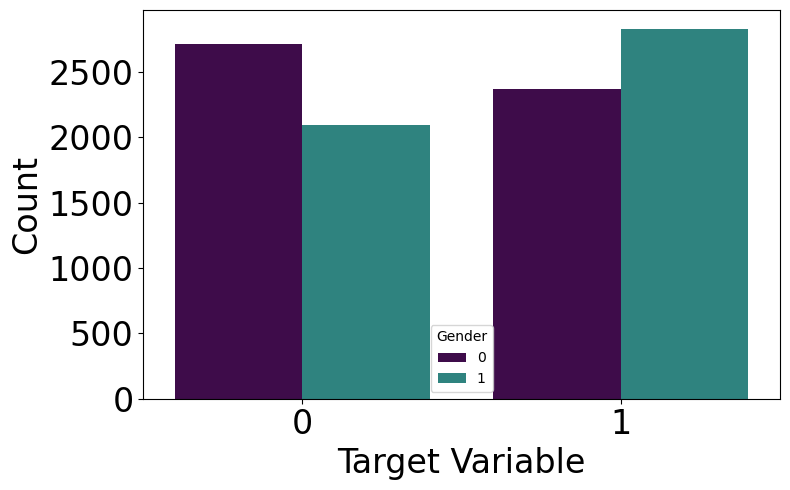

🔍 Outcome disparity by Y:
Y
0    0.0
1    1.0
Name: Y, dtype: float64
Disparity (max - min): 1.0000

🔍 Treatment disparity in LoanAmount by Gender:
Gender
0    7.844924
1    9.762189
Name: LoanAmount, dtype: float64
Disparity (max - min) in LoanAmount: 1.9173

🔍 Treatment disparity in Duration by Gender:
Gender
0    11.440499
1     6.870262
Name: Duration, dtype: float64
Disparity (max - min) in Duration: 4.5702



In [20]:
file_path_inter = "../config/intersectional_discrimination.yaml"
config_intersectional_discr = load_config(file_path_inter)
measure_bias_col = config_intersectional_discr['measure_bias_col']

plot_measure_discrimination(result_intersectional_discr, measure_bias_col=measure_bias_col, data_name='Intersectional Axis Bias', plot=True, plot_intersectional=plot_intersectional)

### Case Five: Compounded Discrimination

Here, we model such that the additive (multiple) and non-additive(intersectional) of the sensitive attributes influence the outcome.

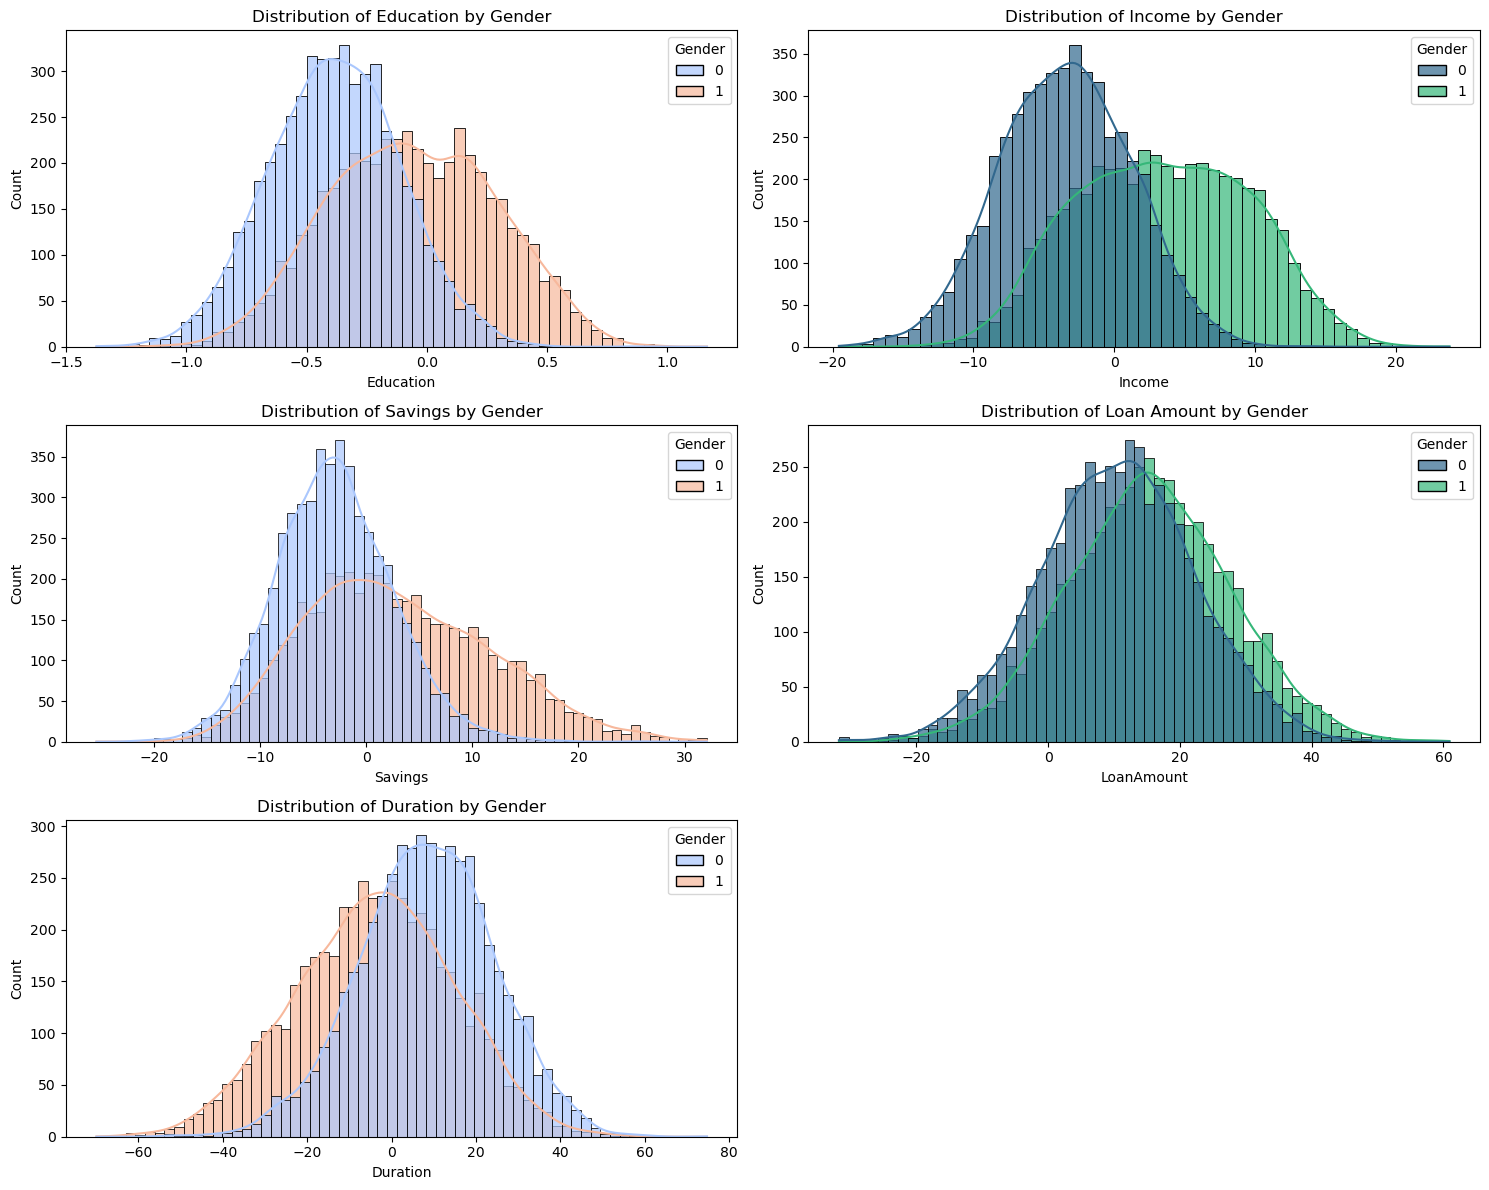

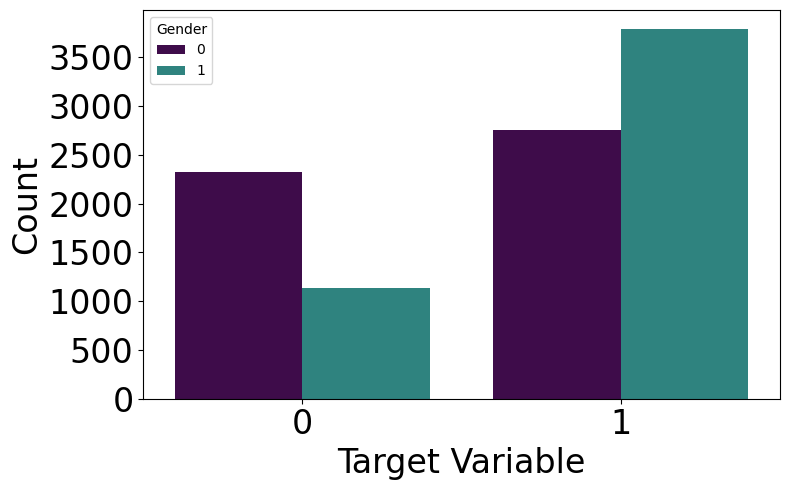

🔍 Outcome disparity by Y:
Y
0    0.0
1    1.0
Name: Y, dtype: float64
Disparity (max - min): 1.0000

🔍 Treatment disparity in LoanAmount by Gender:
Gender
0    10.548474
1    15.249233
Name: LoanAmount, dtype: float64
Disparity (max - min) in LoanAmount: 4.7008

🔍 Treatment disparity in Duration by Gender:
Gender
0    8.311153
1   -3.959399
Name: Duration, dtype: float64
Disparity (max - min) in Duration: 12.2706



In [21]:
file_path_compounded = "../config/compounded_discrimination.yaml"
config_compounded_discr = load_config(file_path_compounded)
measure_bias_col = config_compounded_discr['measure_bias_col']
plot_measure_discrimination(result_compounded_discr, measure_bias_col=measure_bias_col, data_name='Compounded Axis Bias', plot=True, plot_intersectional=plot_intersectional)

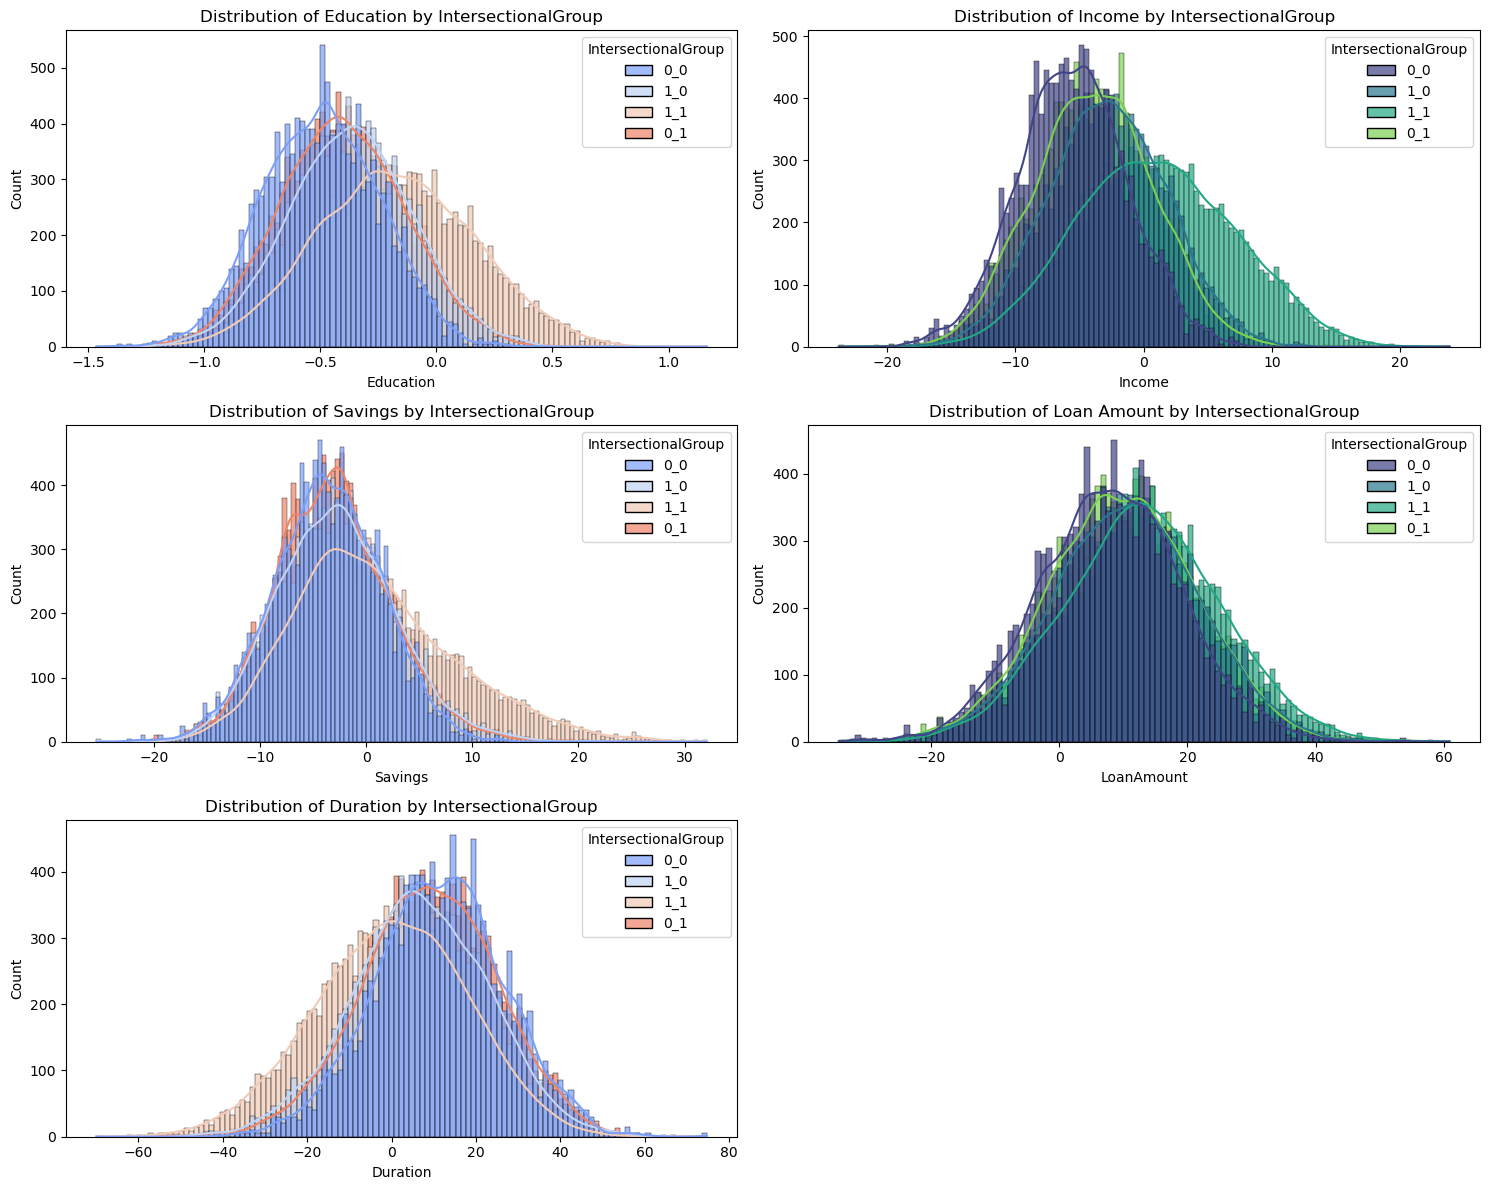

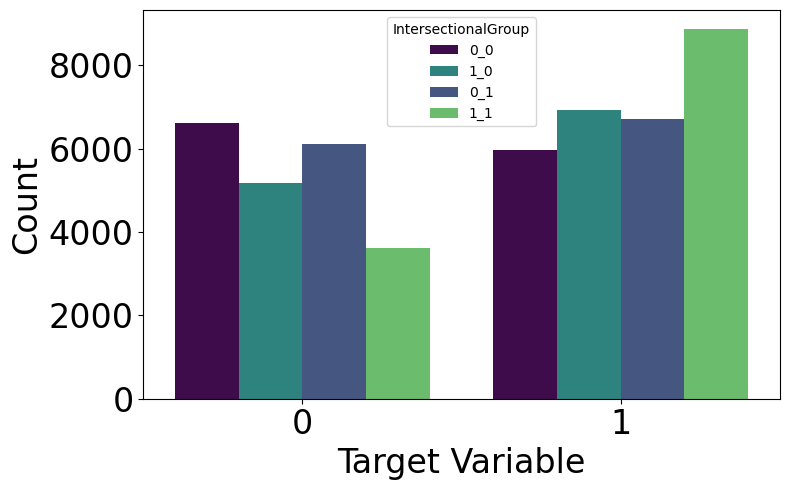

In [22]:


data_combined = pd.concat([result_no_discr.assign(Scenario='No Discrimination'),
                           result_single_discr.assign(Scenario='Single Discrimination'), 
                           result_multiple_discr.assign(Scenario='Multiple Discrimination'),
                           result_intersectional_discr.assign(Scenario='Intersectional Discrimination'),
                           result_compounded_discr.assign(Scenario='Compounded Discrimination')])

visualize_histograms(data_combined, data_name='Combined Dataset Scenarios', measure_bias_col='Scenario')

